In [8]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
a=pd.read_csv(r"C:\Users\user\Downloads\archive\Zomato-data-.csv")
a.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [11]:
a.info()
a.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [12]:
a.sample(5)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
34,Faasos,Yes,No,4.2/5,415,500,other
137,Hotel Andhra Speices,No,No,2.9/5,0,250,Dining
118,Kannadigas Karavali,No,No,3.4/5,0,250,Dining
39,Maruthi Davangere Benne Dosa,Yes,No,4.0/5,17,150,Dining
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [13]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
a['rate']=a['rate'].apply(handlerate)
print(a)


                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

[Text(0, 0, '7'), Text(0, 0, '23'), Text(0, 0, '8'), Text(0, 0, '110')]

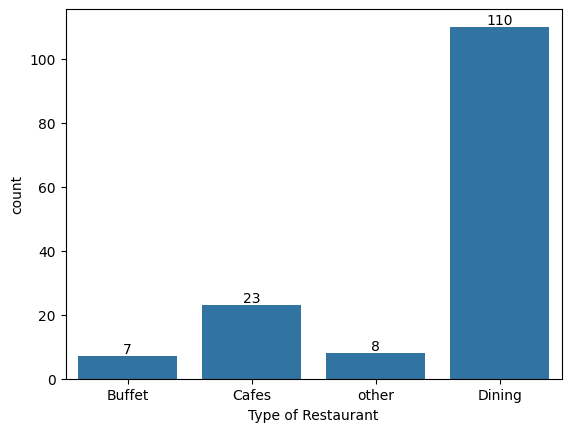

In [14]:
ax=sns.countplot(x="listed_in(type)",data=a)
plt.xlabel("Type of Restaurant")
ax.bar_label(ax.containers[0])


In [15]:
v=a.groupby(["listed_in(type)"],as_index=False)["votes"].sum()


Text(0.5, 0, 'Type of Restaurant')

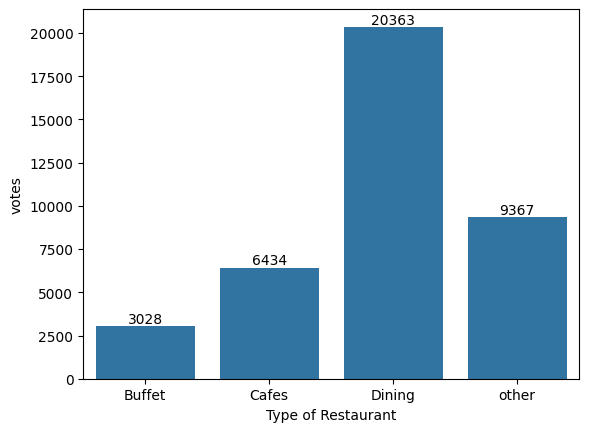

In [16]:
ax=sns.barplot(x='listed_in(type)',y='votes',data=v,errorbar=None)
ax.bar_label(ax.containers[0])
plt.xlabel("Type of Restaurant")


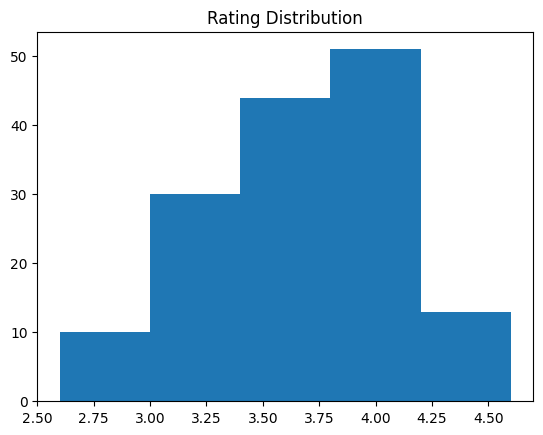

In [17]:
plt.hist(a['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()


In [18]:
c=a.groupby(['online_order'],as_index=False)['approx_cost(for two people)'].mean().round(0)


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

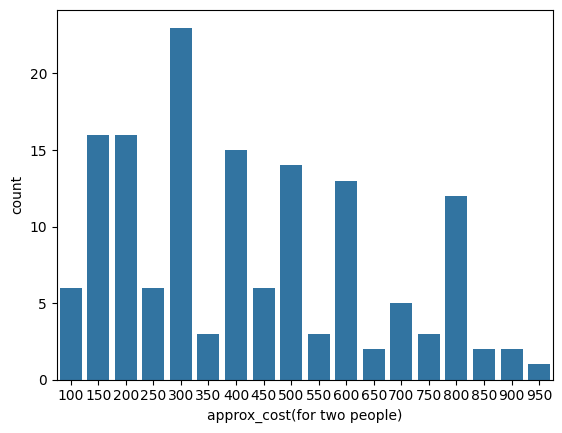

In [19]:
sns.countplot(data=a,x="approx_cost(for two people)")


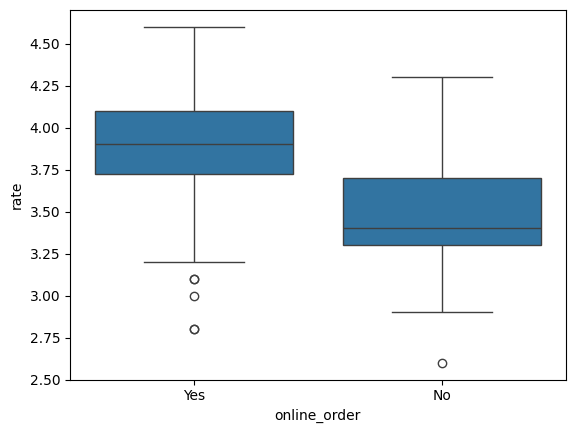

In [20]:
ax=sns.boxplot(data=a,x='online_order',y='rate')


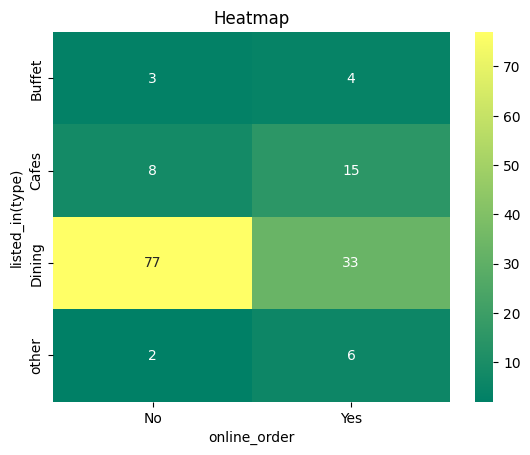

In [21]:
d=a.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(d,annot=True,cmap='summer',fmt='d')
plt.title('Heatmap')
plt.show()
